# Capstone Requirements

Problem: Analyze sentiments in healthcare reviews.
Objective: Develop a model to classify sentiments.
Tasks:
Data Preprocessing
Sentiment Analysis Model
Model Evaluation
Insights & Visualization

Data : healthcare_reviews

# Load File using Read CSV command

# Machine learning Pipeline

### Step 1 : EDA 
### Step 2 : Check for a null and Imput with default values
### Step 3 : Punctuation removal, tokenization, Stop words removal
### Step 4 : Stemming or lemmatizing 

In [1]:
import numpy as np
import pandas as pd
import string
import nltk

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
raw_review_data = pd.read_csv('healthcare_reviews.csv')

In [3]:
raw_review_data.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [4]:
raw_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
raw_review_data.describe()

,Rating
count,1000.000000
mean,3.058000
std,1.425015
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [6]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(raw_review_data), len(raw_review_data.columns)))

# How many rating 2, 3, 4, 5 are there out of 1000 ?

print("Out of {} rows, {} are 5, {} are 4,, {} are 3, {} are 2".format(len(raw_review_data),
                                                       len(raw_review_data[raw_review_data['Rating']==5]),
                                                       len(raw_review_data[raw_review_data['Rating']==4]),
                                                       len(raw_review_data[raw_review_data['Rating']==3]),   
                                                       len(raw_review_data[raw_review_data['Rating']==2]),
                                                     ))

Input data has 1000 rows and 2 columns
Out of 1000 rows, 211 are 5, 223 are 4,, 168 are 3, 209 are 2


In [7]:
# How much missing data is there?

print("Number of null in Review_Text: {}".format(raw_review_data['Review_Text'].isnull().sum()))
print("Number of null in Rating: {}".format(raw_review_data['Rating'].isnull().sum()))

Number of null in Review_Text: 100
Number of null in Rating: 0


In [8]:
# Fill missing values in 'Review_Text' column with a default value ('No Review')
default_value = 'No Review'
raw_review_data['Review_Text'].fillna(default_value, inplace=True)

In [9]:
# check values in 'Review_Text' column with default value ('No Review')
len(raw_review_data[raw_review_data['Review_Text'] == 'No Review'])

100

In [10]:
# How much missing data is there after imputation?

print("Number of null in Review_Text: {}".format(raw_review_data['Review_Text'].isnull().sum()))
print("Number of null in Rating: {}".format(raw_review_data['Rating'].isnull().sum()))

Number of null in Review_Text: 0
Number of null in Rating: 0


# EDA through visualisation

In [11]:
# Calculate the length of 'Review_Text' and store it in a new column 'Review_Length'
raw_review_data['Review_Length'] = raw_review_data['Review_Text'].apply(len)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

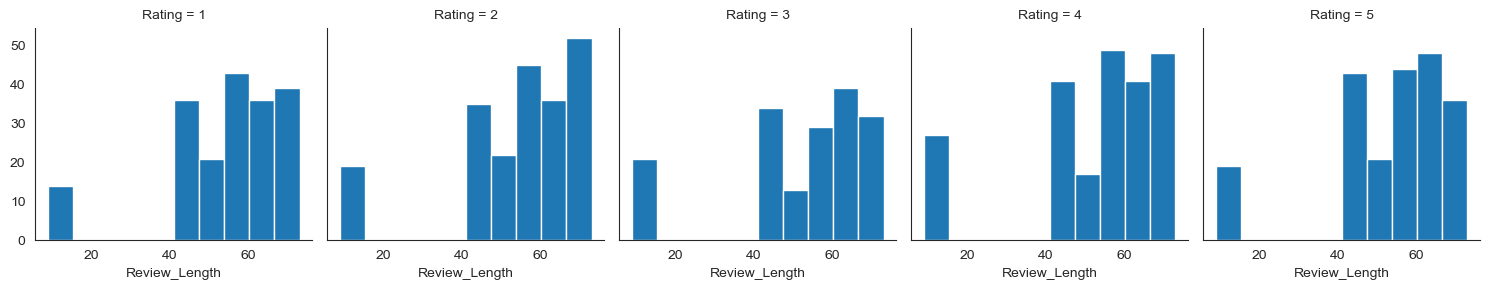

In [13]:
g = sns.FacetGrid(raw_review_data,col='Rating')
g.map(plt.hist,'Review_Length')

#### Looks like the distribution is similar for all ratings
#### text length for all star rating ranges mostly ranges between 40 and 100 
#### all ratings have a length <20 for 10-20 messages, they can be considered as outliers 

<Axes: xlabel='Rating', ylabel='Review_Length'>

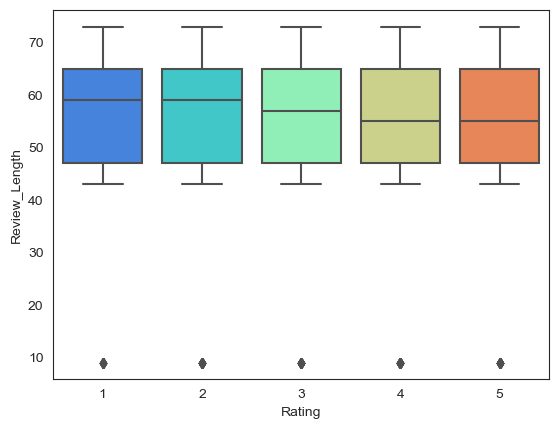

In [14]:
#Create a boxplot of text length for each Rating category.
sns.boxplot(x='Rating',y='Review_Length',data=raw_review_data,palette='rainbow')

In [15]:
# Create a boolean mask for rows where 'Review_Text' length is less than 30
#mask = raw_review_data['Review_Length'] < 30

# Use np.where to create a subset of the DataFrame based on the mask
#subset_df = raw_review_data[np.where(mask)]
subset_df = raw_review_data[raw_review_data['Review_Length'] < 30]
subset_df.head()

,Review_Text,Rating,Review_Length
6,No Review,2,9
25,No Review,4,9
27,No Review,4,9
30,No Review,4,9
32,No Review,2,9


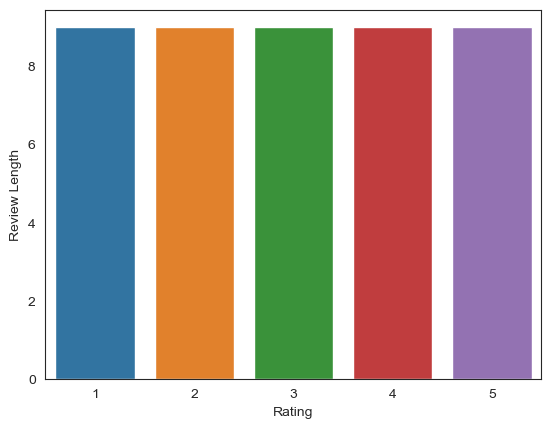

In [16]:
# Create a bar plot using Seaborn
sns.barplot(x='Rating', y='Review_Length', data=subset_df)

# Set labels for the x and y axes
plt.xlabel('Rating')
plt.ylabel('Review Length')

# Show the plot
plt.show()

<Axes: xlabel='Rating', ylabel='count'>

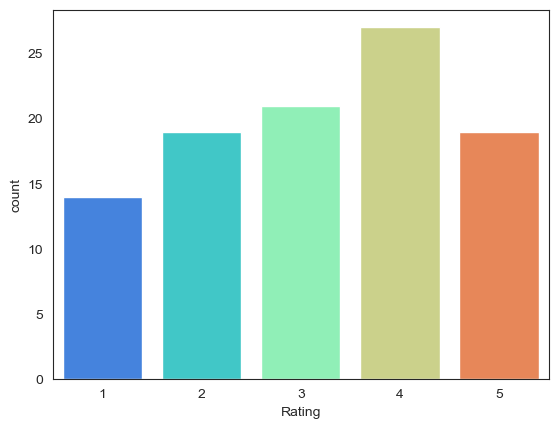

In [17]:
sns.countplot(x='Rating',data=subset_df,palette='rainbow')

In [18]:
# To use the ratings more effectively we are going change rating >4 to to "Good rating" 3 to neutral and < 3 to "Not good rating"
# so we can use them for our modelling appropriately
# Create a boolean mask for rows where 'Rating' is greater than 4 and 'Review_Text' is 'No Review'
mask = (raw_review_data['Rating'] >= 4) & (raw_review_data['Review_Text'] == 'No Review')

# Use np.where to conditionally update 'Review_Text'
raw_review_data['Review_Text'] = np.where(mask, 'this is a good rating', raw_review_data['Review_Text'])
len(raw_review_data[raw_review_data['Review_Text'] == 'this is a good rating'])

46

In [19]:
# Create a boolean mask for rows where 'Rating' is equal to 3 and 'Review_Text' is 'No Review'
mask = (raw_review_data['Rating'] == 3) & (raw_review_data['Review_Text'] == 'No Review')

# Use np.where to conditionally update 'Review_Text'
raw_review_data['Review_Text'] = np.where(mask, 'this is a neutral rating', raw_review_data['Review_Text'])
len(raw_review_data[raw_review_data['Review_Text'] == 'this is a neutral rating'])

21

In [20]:
# Create a boolean mask for rows where 'Rating' is equal to 3 and 'Review_Text' is 'No Review'
mask = (raw_review_data['Rating'] <=2) & (raw_review_data['Review_Text'] == 'No Review')

# Use np.where to conditionally update 'Review_Text'
raw_review_data['Review_Text'] = np.where(mask, 'this is a bad rating', raw_review_data['Review_Text'])
len(raw_review_data[raw_review_data['Review_Text'] == 'this is a bad rating'])

33

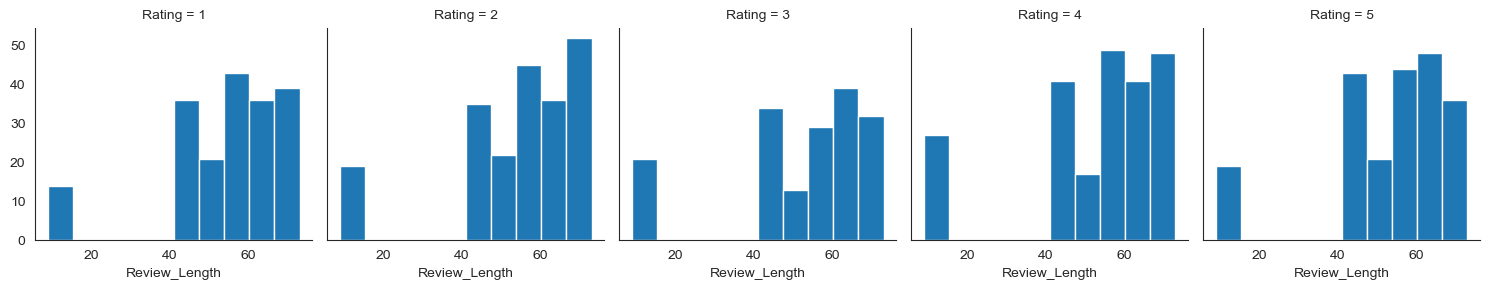

In [21]:
g = sns.FacetGrid(raw_review_data,col='Rating')
g.map(plt.hist,'Review_Length')

# Cleaning the text

In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [24]:
# Define the clean_text function
def cleaned_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [25]:
#Apply clean_text function to Data set
raw_review_data['Review_Text_Cleaned'] = raw_review_data['Review_Text'].apply(cleaned_text)
raw_review_data.head(15)

,Review_Text,Rating,Review_Length,Review_Text_Cleaned
0,I have mixed feelings about my experience.,4,43,mixed feelings experience
1,The staff was caring and attentive. I couldn't...,5,59,staff caring attentive couldnt happier
2,I have mixed feelings about my experience.,5,43,mixed feelings experience
3,I have mixed feelings about my experience.,5,43,mixed feelings experience
4,The healthcare provider was excellent. I had a...,3,65,healthcare provider excellent great experience
5,The staff was caring and attentive. I couldn't...,4,59,staff caring attentive couldnt happier
6,this is a bad rating,2,9,bad rating
7,I had a bad experience with this healthcare pr...,2,73,bad experience healthcare provider Avoid possible
8,I have mixed feelings about my experience.,3,43,mixed feelings experience
9,I have mixed feelings about my experience.,5,43,mixed feelings experience


##  Stemming and Lemmatization
### We will go with lemmatization for this project as the data set is not really huge

In [26]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization on a text
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Lemmatize each word and join them back into a sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [27]:
raw_review_data['Review_Text_Cleaned'] = raw_review_data['Review_Text_Cleaned'].apply(lemmatize_text)

## Feature Engineering 

In [29]:
# Define conditions and corresponding values for Review_Sentiment
conditions = [
    (raw_review_data['Rating'] > 3),
    (raw_review_data['Rating'] == 3),
    (raw_review_data['Rating'] < 3)
]

values = ['Positive', 'Neutral', 'Negative']

# Use numpy.where to create the Review_Sentiment column
raw_review_data['Review_Sentiment'] = np.select(conditions, values, default='Neutral')


In [31]:
raw_review_data.head(20)

,Review_Text,Rating,Review_Length,Review_Text_Cleaned,Review_Sentiment
0,I have mixed feelings about my experience.,4,43,mixed feeling experience,Positive
1,The staff was caring and attentive. I couldn't...,5,59,staff caring attentive couldnt happier,Positive
2,I have mixed feelings about my experience.,5,43,mixed feeling experience,Positive
3,I have mixed feelings about my experience.,5,43,mixed feeling experience,Positive
4,The healthcare provider was excellent. I had a...,3,65,healthcare provider excellent great experience,Neutral
5,The staff was caring and attentive. I couldn't...,4,59,staff caring attentive couldnt happier,Positive
6,this is a bad rating,2,9,bad rating,Negative
7,I had a bad experience with this healthcare pr...,2,73,bad experience healthcare provider Avoid possible,Negative
8,I have mixed feelings about my experience.,3,43,mixed feeling experience,Neutral
9,I have mixed feelings about my experience.,5,43,mixed feeling experience,Positive


## Use TF_IDF vectorizer fit and transform the data 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Initialize the TF-IDF vectorizer with analyzer='word'
tfidf_vectorizer = TfidfVectorizer(analyzer='word')
# Fit and transform the 'Review_Text_Cleaned' column
tfidf_matrix = tfidf_vectorizer.fit_transform(raw_review_data['Review_Text_Cleaned'])

In [95]:
# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.447214,0.0,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.447214,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542016,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.447214,0.0,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.447214,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.000000,0.608301,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.793706,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.509806,0.000000,0.378729,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
X_features = pd.concat([raw_review_data['Rating'], raw_review_data['Review_Length'], tfidf_df], axis=1)
X_features.head()

,Rating,Review_Length,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,4,43,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,5,59,0.447214,0.0,0.0,0.0,0.0,0.447214,0.0,0.447214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0
2,5,43,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,5,43,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,3,65,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Explore RandomForestClassifier through Holdout Set

In [97]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_features, raw_review_data['Review_Sentiment'], test_size=0.2)

In [101]:
X_train

,Rating,Review_Length,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
490,5,55,0.0,0.0,0.0,0.474366,0.0,0.0,0.474366,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.316082,0.0,0.0,0.474366,0.0
980,2,47,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.344984,0.0,0.0,0.000000,0.0
22,5,55,0.0,0.0,0.0,0.474366,0.0,0.0,0.474366,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.316082,0.0,0.0,0.474366,0.0
308,3,43,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
452,2,55,0.0,0.0,0.0,0.474366,0.0,0.0,0.474366,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.316082,0.0,0.0,0.474366,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,4,55,0.0,0.0,0.0,0.474366,0.0,0.0,0.474366,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.316082,0.0,0.0,0.474366,0.0
881,2,47,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.344984,0.0,0.0,0.000000,0.0
306,4,68,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.427487,0.0,0.427487,0.427487,0.293728,0.0,0.0,0.000000,0.0
652,4,55,0.0,0.0,0.0,0.474366,0.0,0.0,0.474366,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.316082,0.0,0.0,0.474366,0.0


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
X_train.columns = X_train.columns.astype(str)
rf_model = rf.fit(X_train, y_train)

In [105]:
X_test.columns = X_test.columns.astype(str)
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred,average='macro')

In [106]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 1.0 / Accuracy: 1.0


In [107]:
X_test

,Rating,Review_Length,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
703,3,68,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.427487,0.000000,0.427487,0.427487,0.293728,0.0,0.000000,0.000000,0.000000
747,5,9,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.743774,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
940,4,65,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.518278,0.000000,0.000000,0.000000,0.0,0.518278,0.000000,0.518278
625,2,73,0.0,0.000000,0.509806,0.000000,0.378729,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
405,1,43,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,4,47,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.344984,0.0,0.000000,0.000000,0.000000
738,5,55,0.0,0.000000,0.000000,0.474366,0.000000,0.0,0.474366,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.316082,0.0,0.000000,0.474366,0.000000
861,5,52,0.0,0.526309,0.000000,0.000000,0.396002,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
791,3,9,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.564369,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [109]:

test_string = "I have mixed feelings about my experience"
test_data =[test_string]
pred_vec = tfidf_vectorizer.transform(test_data)
test_df = pd.DataFrame(pred_vec.toarray())
#test_df
df = pd.DataFrame({'Rating': [4], 'Review_Length': [len(test_string)]})
X_features_input =pd.concat([df,test_df],axis=1)
X_features_input.columns = X_features_input.columns.astype(str)
predicted_out = rf_model.predict(X_features_input)
predicted_out

array(['Positive'], dtype=object)

In [112]:
test_string = "I did not like my stay, was not good, no customer care"
test_data =[test_string]
pred_vec = tfidf_vectorizer.transform(test_data)
test_df = pd.DataFrame(pred_vec.toarray())
#test_df
df = pd.DataFrame({'Rating': [2], 'Review_Length': [len(test_string)]})
X_features_input =pd.concat([df,test_df],axis=1)
X_features_input.columns = X_features_input.columns.astype(str)
predicted_out = rf_model.predict(X_features_input)
predicted_out

array(['Negative'], dtype=object)

In [113]:
test_string = "Its a netural feeling, seems ok"
test_data =[test_string]
pred_vec = tfidf_vectorizer.transform(test_data)
test_df = pd.DataFrame(pred_vec.toarray())
#test_df
df = pd.DataFrame({'Rating': [3], 'Review_Length': [len(test_string)]})
X_features_input =pd.concat([df,test_df],axis=1)
X_features_input.columns = X_features_input.columns.astype(str)
predicted_out = rf_model.predict(X_features_input)
predicted_out

array(['Neutral'], dtype=object)